# Case 2 - Simple Conv2D models
Neural Networks for Machine Learning Applications<br>
20.2.2022, Jesse Jyrälä & Lauri Marjanen<br>
Metropolia University of Applied Sciences

# Idea of this model

Idea of this model is to test what very simple conv2d models can do with this problem. In this model we have left out all data augmentation, fitting, data balancing and complicated layers. We only use conv2d, activation(relu) and maxpooling2d since you need to use it with conv2d to get anything usefull out of it.

In [1]:
# Read in the libraries
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

print('Tensorflow version: ', tf.__version__)

Tensorflow version:  2.7.0


## Dataset

In [2]:
#All images in dataset are sized 128x128 pixels
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

In [3]:
# Reading data from my local computer
data_dir = "D:/Koulu/Datasets/Case2Data/chest_xray/train"
os.listdir(data_dir)

['NORMAL', 'PNEUMONIA']

### Data generators

In [4]:
# Creating datasets for training and validation with 4 to 1 split
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = IMG_SIZE,
  batch_size = BATCH_SIZE)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = IMG_SIZE,
  batch_size = BATCH_SIZE)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


## Modeling


In [5]:
IMG_SHAPE = IMG_SIZE + (3,)

Remeber to comment out all but one model that you want to test.

# Model Nro. 1

First I tried very simple model but it didnt work since the feature maps are 3d after the first 3 layers but dense requires 1d feature vectors. 

In [6]:
# model = Sequential()

# model.add(Conv2D(64, (3, 3), input_shape=IMG_SHAPE))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# Model Nro. 2

I need to use Flatten() to convert it so I can run it to dense layers. I also added layer of Dense(64) just because it seemed to work quite well. This yielded a validation accuarcy of 97 % but the loss vas very big. I added more layers to see what would happen. I first made model that had the conv2d, activatio and maxpooling layers two times. That reduced loss significantly without effecting accuracy too much.

In [7]:
# model = Sequential()

# model.add(Conv2D(64, (3, 3), input_shape=IMG_SHAPE))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(64))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# Model Nro. 3

Lastly I tried adding one more bundle of conv2d, activation and maxpooling layers and that gave the best result ot of my testing with approximetly 9% loss and 96% accuracy on validation.

In [8]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=IMG_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model Nro. 4

I also wanted to try elevating the amount of neurons and see how that would effect the model. When amount of neurons is elevated to 256 neurons from 64 it seemd at the start to work pretty good but my evidence is limited since every time I ran this my computer crashed even before the first epoch was ready. Seems like its too big of a network and it runs into a memory shortage what causes the computer to crash without any warnings or bluescreen.

In [9]:
#DONT RUN MIGHT CRASH YOUR COMPUTER
# ----------------------------------
# model = Sequential()

# model.add(Conv2D(256, (3, 3), input_shape=IMG_SHAPE))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(64))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

## Training

In [10]:
trained = model.fit(train_dataset, batch_size=32, epochs=5)

Epoch 1/5
131/131 [==============================] - 60s 453ms/step - loss: 28.5164 - accuracy: 0.8092
Epoch 2/5
131/131 [==============================] - 58s 436ms/step - loss: 0.4076 - accuracy: 0.8624
Epoch 3/5
131/131 [==============================] - 59s 445ms/step - loss: 0.3065 - accuracy: 0.8821
Epoch 4/5
131/131 [==============================] - 59s 444ms/step - loss: 0.2548 - accuracy: 0.8998
Epoch 5/5
131/131 [==============================] - 59s 450ms/step - loss: 0.2260 - accuracy: 0.9137


## Evaluation

In [11]:
# Evaluation after training

loss1, accuracy1 = model.evaluate(val_dataset)

print(f"Validation loss:     {loss1:.2f}")
print(f"Validation accuracy: {accuracy1:.2f}")

33/33 [==============================] - 5s 126ms/step - loss: 0.4490 - accuracy: 0.8888
Validation loss:     0.45
Validation accuracy: 0.89


### Learning curves

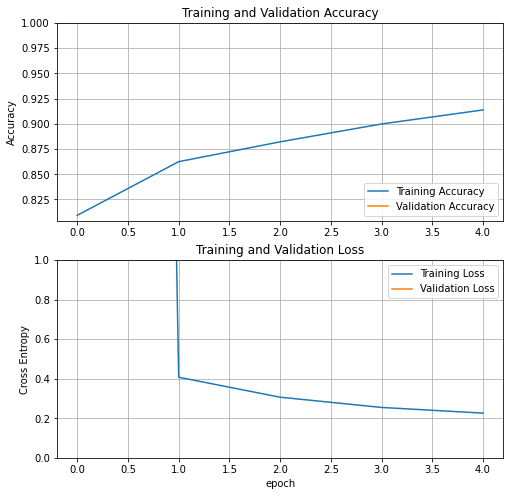

In [12]:

acc = trained.history['accuracy']
val_acc = accuracy1

loss = trained.history['loss']
val_loss = loss1

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.grid()
plt.show()

# Conclusion

Overall this was a intresting model to work with. Just using the basic tools of conv2d to get a understanding how different amount of layers work and what is required to get a decent result when you already have a good dataset to start with. In this problem we dont need to preprocess the data at all since it is already cleaned and pretty well balanced. This means we can get to really high accuracy with simple networks. 96% validation accuracy and 9% loss is pretty good result for this model.